## ML MIPT Practical 3

В данном домашнем задании вы будете решать задачу классификации отзывов.

Шаги решения:

1. Извлечение признаков: напишите код для создания TF-IDF матрицы из представленного корпуса отзывов
2. Обучение моделей: напишите код для обучения SVM и логистической регрессии
3. Кросс-валидация для подбора гиперпараметров: напишите код для оптимизации метрик обучения
4. Участие в контесте на kaggle.com

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

-------
#### Знакомство с данными

In [2]:
data = pd.read_csv('data_practical_3.csv', index_col=0, na_values='NaN')
print data.shape
print data.head()

(525789, 2)
                 reviews  score
0  Good Quality Dog Food      3
1      Not as Advertised      0
2  "Delight" says it all      2
3         Cough Medicine      1
4            Great taffy      3


In [3]:
documents = data.reviews.values
score = data.score.values

Как видите, каждый объект представляет собой отзыв о продукте и оценку по шкале от 0 до 3. Выдвинем гипотезу, что слова, используемые в написании отзыва коррелируют с оценкой, которая была поставлена. Поставим задачу - предсказать оценку, по тексту отзыва.

-----
### 1. Извлечение признаков - 10 Баллов
 

1. Для решения задачи классификации необходимо преобразовать каждый отзыв (документ) в вектор. Размерность данного вектора будет равна количеству слов используемых в корпусе (все документы). Каждая координата соответствует слову, значение в координает равно количеству раз, слово используется в документе. 

Для решения данной задачи вам необходимо написать код, который преобразовывает матрицу документов в численную матрицу.

Дополнительная информация для решения задачи:

- Подробнее про векторное представление документов: http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
- Используйте данный трансформер: http://scikit-learn.org/stable/modules/feature_extraction.html#common-vectorizer-usage
- Подробнее про разреженные матрицы: http://docs.scipy.org/doc/scipy-0.14.0/reference/sparse.html
- Hashing trick: https://en.wikipedia.org/wiki/Feature_hashing

Используйте n_features = 3000

Для учета важности редких, но показательных слов (термов), используется схема взвешивания TF-IDF. Напишите код, принимающий на вход разреженную матрицу векторного представления документов и возвращающий разреженную матрицу документов, частоты термов которых взвешенны по TF-IDF.

Дополнительная информация для решения задачи:

- Подробнее про TF-IDF: https://en.wikipedia.org/wiki/Tf%E2%80%93idf
- Используйте трансформер: http://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting

Преобразуем csc матрицу в numpy array

------

### 2. Код для SVM и логистической регресии - 40 Баллов

После того, как вы получили матрицу признаков, вам необходимо реализовать алгоритм обучения SVM и логистической регрессии. Обе модели являются линейными и отличаются функциями потерь. Для решения оптимизационных задач в обеих моделей будет использоваться стохастический градиентный спуск.

Дополнительная информация для решения задачи:

- Линейные модели: http://cs231n.github.io/linear-classify/
- SGD: http://cs231n.github.io/optimization-1

Начнем с SVM стартовый код находится в файле cs231n/classifiers/linear_svm.py вашей задачей является реализация подсчета функции потерь для SVM

Разбейте обучающую выборку на 2 части train и test

Дополнительная информация для решения задачи:
- Используйте трансформер: http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split

Транспонируем матрицы с данными, т.к. так будет проще реализовать код SVM

Возьмем подвыборки из обучающей выборки, для быстрой проверки кода.

In [19]:
X_train_sample = X_train[:, 0:100000]
y_train_sample = y_train[0:100000]

Найдем чему равен градиент:

In [113]:
from cs231n.classifiers.linear_svm import svm_loss_naive
import time

# generate a random SVM weight matrix of small numbers
W = np.random.randn(4, X_train_sample.shape[0]) * 0.01 
loss, grad = svm_loss_naive(W, X_train_sample, y_train_sample, 0.00001)
print 'loss: %f' % (loss, )

loss: 2.999805


Градиент равен 0, т.к. код который должен его считать отсутствует. Реализуйте наивную версию и проверьте результат с помощью численного метода расчета. Градиенты должны почти совпадать.

In [114]:
# Once you've implemented the gradient, recompute it with the code below
# and gradient check it with the function we provided for you

# Compute the loss and its gradient at W.
loss, grad = svm_loss_naive(W, X_train_sample, y_train_sample, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_train_sample, y_train_sample, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 5)

numerical: 0.000200 analytic: 0.000200, relative error: 2.355984e-08
numerical: -0.000030 analytic: -0.000030, relative error: 1.109517e-07
numerical: -0.000079 analytic: -0.000079, relative error: 1.378125e-08
numerical: -0.000053 analytic: -0.000053, relative error: 6.905922e-07
numerical: 0.000215 analytic: 0.000215, relative error: 6.402142e-08


Теперь реализуйте векторизованную версию расчета фунции потерь - svm_loss_vectorized

In [22]:
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_train_sample, y_train_sample, 0.00001)
toc = time.time()
print 'Naive loss: %e computed in %fs' % (loss_naive, toc - tic)

from cs231n.classifiers.linear_svm import svm_loss_vectorized
tic = time.time()
loss_vectorized, _ = svm_loss_vectorized(W, X_train_sample, y_train_sample, 0.00001)
toc = time.time()
print 'Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic)

# The losses should match but your vectorized implementation should be much faster.
print 'difference: %f' % (loss_naive - loss_vectorized)

Naive loss: 2.999971e+00 computed in 3.390165s
Vectorized loss: 2.999971e+00 computed in 0.377392s
difference: -0.000000


Завершите реализацию SVM, реализуйте векторизированную версию расчета градиента.

In [23]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_train_sample, y_train_sample, 0.00001)
toc = time.time()
print 'Naive loss and gradient: computed in %fs' % (toc - tic)

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_train_sample, y_train_sample, 0.00001)
toc = time.time()
print 'Vectorized loss and gradient: computed in %fs' % (toc - tic)

# The loss is a single number, so it is easy to compare the values computed
# by the two implementations. The gradient on the other hand is a matrix, so
# we use the Frobenius norm to compare them.
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print 'difference: %f' % difference

Naive loss and gradient: computed in 3.391320s
Vectorized loss and gradient: computed in 0.359981s
difference: 0.000000


### Stochastic Gradient Descent

In [158]:
# Now implement SGD in LinearSVM.train() function and run it with the code below
from cs231n.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=5e-2, reg=0.01,
                      num_iters=500, verbose=True, batch_size=20000)

toc = time.time()
print 'That took %fs' % (toc - tic)
print 'Current loss is %f' % loss_hist[-1]

iteration 0 / 500: loss 3.000214
iteration 100 / 500: loss 2.627704
iteration 200 / 500: loss 2.333229
iteration 300 / 500: loss 2.128932
iteration 400 / 500: loss 2.026846
That took 269.666517s
Current loss is 1.959731


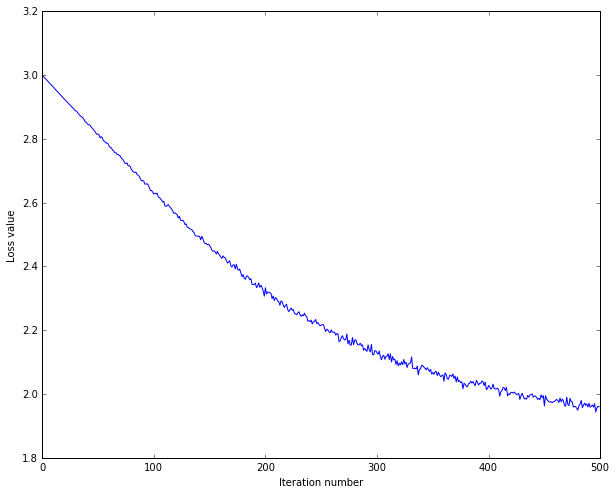

In [159]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

In [160]:
# Write the LinearSVM.predict function 
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

In [161]:
#and evaluate the performance on both the test set
from sklearn.metrics import classification_report

In [162]:
print classification_report(y_test, y_test_pred)

             precision    recall  f1-score   support

          0       0.54      0.20      0.30     15609
          1       0.14      0.03      0.05      8811
          2       0.29      0.02      0.03     24281
          3       0.71      0.97      0.82    109036

avg / total       0.60      0.70      0.61    157737



In [163]:
# compare result with the most common dummy classifier
print classification_report(y_test, [3]*len(y_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00     15609
          1       0.00      0.00      0.00      8811
          2       0.00      0.00      0.00     24281
          3       0.69      1.00      0.82    109036

avg / total       0.48      0.69      0.57    157737



--------

## Softmax Classifier

In [164]:
# First implement the naive softmax loss function with nested loops.
# Open the file cs231n/classifiers/softmax.py and implement the
# softmax_loss_naive function.

from cs231n.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(4, X_train_sample.shape[0]) * 0.01 
loss, grad = softmax_loss_naive(W, X_train_sample, y_train_sample, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print 'loss: %f' % loss
print 'sanity check: %f' % (-np.log(0.1))

loss: 1.386988
sanity check: 2.302585


In [165]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops.
loss, grad = softmax_loss_naive(W, X_train_sample, y_train_sample, 0.0)

# As we did for the SVM, use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_train_sample, y_train_sample, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 5)

numerical: 0.000008 analytic: 0.000008, relative error: 2.102112e-07
numerical: -0.000015 analytic: -0.000015, relative error: 1.115073e-06
numerical: 0.000004 analytic: 0.000004, relative error: 1.951983e-07
numerical: -0.000035 analytic: -0.000035, relative error: 9.769634e-08
numerical: 0.000101 analytic: 0.000101, relative error: 2.062913e-07


In [166]:
# Now that we have a naive implementation of the softmax loss function and its gradient,
# implement a vectorized version in softmax_loss_vectorized.
# The two versions should compute the same results, but the vectorized version should be
# much faster.
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_train_sample, y_train_sample, 0.00001)
toc = time.time()
print 'naive loss: %e computed in %fs' % (loss_naive, toc - tic)

from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_train_sample, y_train_sample, 0.00001)
toc = time.time()
print 'vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic)

# As we did for the SVM, we use the Frobenius norm to compare the two versions
# of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print 'Loss difference: %f' % np.abs(loss_naive - loss_vectorized)
print 'Gradient difference: %f' % grad_difference

naive loss: 1.386994e+00 computed in 6.640193s
vectorized loss: 1.386994e+00 computed in 0.427882s
Loss difference: 0.000000
Gradient difference: 0.000000


In [167]:
from cs231n.classifiers import Softmax
sm = Softmax()
tic = time.time()
loss_hist = sm.train(X_train, y_train, learning_rate=5e-2, reg=0.01,
                      num_iters=500, verbose=True, batch_size=20000)

toc = time.time()
print 'That took %fs' % (toc - tic)
print 'Current loss is %f' % loss_hist[-1]

iteration 0 / 500: loss 1.386299
iteration 100 / 500: loss 1.363543
iteration 200 / 500: loss 1.343818
iteration 300 / 500: loss 1.325619
iteration 400 / 500: loss 1.309761
That took 273.411873s
Current loss is 1.296077


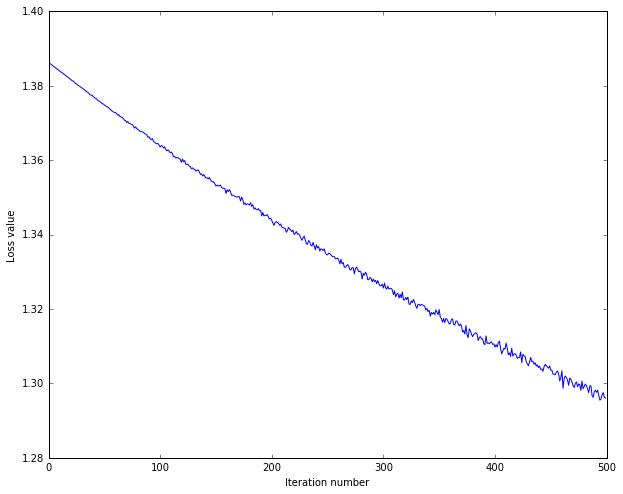

In [168]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

In [170]:
# Write the LinearSVM.predict function 
y_train_pred = sm.predict(X_train)
y_test_pred = sm.predict(X_test)

In [171]:
print classification_report(y_test, y_test_pred)

             precision    recall  f1-score   support

          0       0.52      0.20      0.29     15609
          1       0.13      0.03      0.05      8811
          2       0.25      0.02      0.04     24281
          3       0.71      0.97      0.82    109036

avg / total       0.59      0.69      0.60    157737



In [172]:
# compare result with the most common dummy classifier
print classification_report(y_test, [3]*len(y_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00     15609
          1       0.00      0.00      0.00      8811
          2       0.00      0.00      0.00     24281
          3       0.69      1.00      0.82    109036

avg / total       0.48      0.69      0.57    157737



------

### 3. Kaggle In Class - 50 Баллов

Используйте полученные модели для решения контеста. Выберете одну из моделей, реализуйте настройку гиперпараметров и пайплайн для предсказания классов тестовой выборки для сабмита в систему.

------

### 4. Бонусы - 30 Баллов

Улучшите результат: 

- Нормализуйте слова в документах, используйте стоп слова, попробуйте различные стратегии нормализации в TF-IDF
- Используйте PCA, Word2Vec для расширения пространства фичей
- Придумайте другие стратегии и улучшайте свой результат